<h1><center>Laboratorio 10: Interpretabilidad 🤖</center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos</strong></center>

### Cuerpo Docente:

- Profesor: Ignacio Meza, Gabriel Iturra
- Auxiliar: Sebastián Tinoco
- Ayudante: Arturo Lazcano, Angelo Muñoz

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: Eduardo Moya
- Nombre de alumno 2: Nicolás Ojeda

### **Link de repositorio de GitHub:** [https://github.com/eduardomoyab/MDS7202_1](https://github.com/eduardomoyab/MDS7202_1)

### Indice 

1. [Temas a tratar](#Temas-a-tratar:)
3. [Descripcción del laboratorio](#Descripción-del-laboratorio.)
4. [Desarrollo](#Desarrollo)

## Temas a tratar

- Clasificación usando `XGBoost`.
- Métodos Agnósticos Globales de Interpretabilidad (`Partial Dependence Plot`, `Permutation Feature Importance`)
- Métodos Agnósticos Locales de Interpretabilidad (`Scoped Rules`, `SHAP`)

## Reglas:

- **Grupos de 2 personas**
- Asistencia **obligatoria** a instrucciones del lab (viernes 16.15). Luego, pueden quedarse trabajando en las salas o irse.
- **No se revisarán entregas de personas ausentes**. 
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Prohibidas las copias. 
- Pueden usar cualquer matrial del curso que estimen conveniente.

### Objetivos principales del laboratorio

- Generar un pipeline de clasificación con `XGBoost`.
- Implementar modelos de interpretabilidad para explicar el funcionamiento del modelo de clasificación.

El laboratorio deberá ser desarrollado sin el uso indiscriminado de iteradores nativos de python (aka "for", "while"). La idea es que aprendan a exprimir al máximo las funciones optimizadas que nos entrega `pandas`, las cuales vale mencionar, son bastante más eficientes que los iteradores nativos sobre DataFrames.

# 1. Problemas Clínicos del Dr. Simi

<p align="center">
  <img src="https://gantz.cl/wp-content/uploads/2020/01/79024136_2718114448239059_7240913062570491904_o.jpg" width="350">
</p>

El reconocido **Dr. Simi**, famoso vendedor de medicamentos en latinoamerica, debido a la creciente prevalencia de enfermedades crónicas, como la diabetes, decidió abrir una clínica especializada en el tratamiento de esta enfermedad en nuestro país.

La clínica del Doctor Simi se convirtió en un lugar donde los pacientes con diabetes podrían recibir atención médica integral. El personal médico estaba compuesto por especialistas en endocrinología, nutrición y enfermería, todos capacitados en el manejo de la diabetes.

Sin embargo él se ha dado cuenta que los tiempos han cambiado y gracias a las tecnologías es posible generar mejores predicciones en la diabetes conociendo el historial médico de las personas. Por esto, el doctor se ha colocado una meta de incluir modelos de machine learning dentro de sus clínicas, para ello le ha solicitado crear un modelo capaz de predecir/clasificar diabetes pero le rogó que el desarrollo del modelo tuviera un especial enfoque en la interpretabilidad de lo que hace su modelo.

Para que usted pueda entrenar el modelo, Dr. Simi le ha entregado un dataset de todos los clientes que fueron detectados con diabetes a lo largo de la historia de la clinica. Con ello, adjunta el historial médico de las personas en forma de datos tabulares para que usted pueda realizar fácilmente la clasificación.


In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv('diabetes_data.csv')
df.head(4)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0


## 2. Clasificación de pacientes con diabetes (0.5 puntos)

<p align="center">
  <img src="https://media.tenor.com/QH--g3ZaSbsAAAAC/dr-simi-abrazo.gif" width="400">
</p>

En primer lugar, el reconocido doctor le pide entrenar un modelo de `XGBoost` utilizando como target la columna `Diabetes` del dataset `diabetes_data.csv`. Para el entrenamiento tome en cuenta **todos** los pasos necesarios para entrenar un modelo de aprendizaje supervisado vistos hasta la fecha (use `Pipeline`, `ColumnTransformer`, etc.), comente sus decisiones y los resultados obtenidos con el modelo. ¿Es acaso un buen predictor de diabetes?, ¿Qué buscan explicar las métricas utilizadas?, ¿las métricas utilizadas para medir la predictibilidad le permiten asegurar que su modelo haga una buena elección de las features?. 

Primero veamos el tipo de variable que son cada una:

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   70692 non-null  float64
 1   Sex                   70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   HeartDiseaseorAttack  70692 non-null  float64
 7   PhysActivity          70692 non-null  float64
 8   Fruits                70692 non-null  float64
 9   Veggies               70692 non-null  float64
 10  HvyAlcoholConsump     70692 non-null  float64
 11  GenHlth               70692 non-null  float64
 12  MentHlth              70692 non-null  float64
 13  PhysHlth              70692 non-null  float64
 14  DiffWalk              70692 non-null  float64
 15  Stroke             

In [3]:
df.isna().sum()

Age                     0
Sex                     0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Stroke                  0
HighBP                  0
Diabetes                0
dtype: int64

In [4]:
#Vemos en cada variable si es una variable numerica o categorica
for col in df.columns:
    #Calculamos la cantidad de valores unicos
    uniq = len(df[col].unique())
    print(f'{col}: {uniq} valores unicos')

Age: 13 valores unicos
Sex: 2 valores unicos
HighChol: 2 valores unicos
CholCheck: 2 valores unicos
BMI: 80 valores unicos
Smoker: 2 valores unicos
HeartDiseaseorAttack: 2 valores unicos
PhysActivity: 2 valores unicos
Fruits: 2 valores unicos
Veggies: 2 valores unicos
HvyAlcoholConsump: 2 valores unicos
GenHlth: 5 valores unicos
MentHlth: 31 valores unicos
PhysHlth: 31 valores unicos
DiffWalk: 2 valores unicos
Stroke: 2 valores unicos
HighBP: 2 valores unicos
Diabetes: 2 valores unicos


In [5]:
df.describe()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,8.584055,0.456997,0.525703,0.975259,29.856985,0.475273,0.147810,0.703036,0.611795,0.788774,0.042721,2.837082,3.752037,5.810417,0.252730,0.062171,0.563458,0.500000
std,2.852153,0.498151,0.499342,0.155336,7.113954,0.499392,0.354914,0.456924,0.487345,0.408181,0.202228,1.113565,8.155627,10.062261,0.434581,0.241468,0.495960,0.500004
min,1.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9.000000,0.000000,1.000000,1.000000,29.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.500000
75%,11.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,0.000000,1.000000,1.000000
max,13.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,1.000000,1.000000


Tras un breve análisis de los datos, consideramos que las variables que contienen solo 2 valores únicos seran variables categóricas. Tambien se puede apreciar que las variables GenHlth, MentHlth y PhysHlth son variables ordinales, mientras que Age y BMI son consideradas como variables numericas. Considerando esto, se aplicará un escalado y codificación de las variables según corresponda.

In [6]:
#Funcion para escalado logaritmico
def log_scaler(df):
    return df.apply(lambda x: np.log(x+1))

              precision    recall  f1-score   support

         0.0       0.77      0.71      0.74      7090
         1.0       0.73      0.79      0.76      7049

    accuracy                           0.75     14139
   macro avg       0.75      0.75      0.75     14139
weighted avg       0.75      0.75      0.75     14139



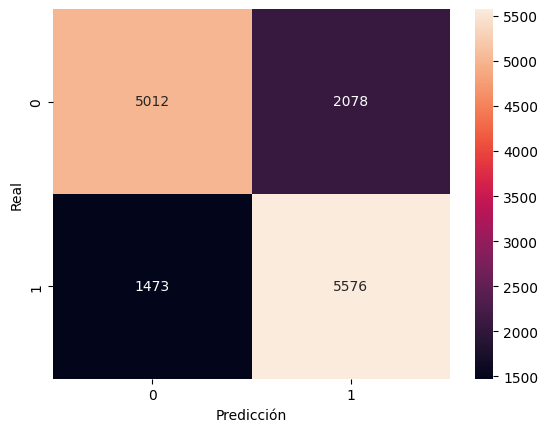

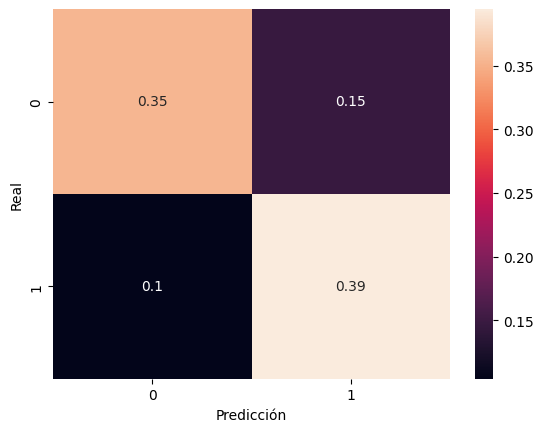

In [7]:
# Inserte su código aquí
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder, MinMaxScaler, FunctionTransformer
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Dividir los datos en características (features) y target
X = df.drop('Diabetes', axis=1)  # Características
y = df['Diabetes']  # Target

# Dividir los datos en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocesamiento: creación del ColumnTransformer para escalar características numéricas
numeric_features = ['Age', 'BMI']
ordinal_features = ['GenHlth', 'MentHlth', 'PhysHlth']
categorical_features = [col for col in df.columns if col not in numeric_features and col not in ordinal_features and len(df[col].unique())==2]
#Eliminamos la variable Diabetes
categorical_features.remove('Diabetes')

numeric_transformer = Pipeline(steps=[
    ('log_scale', FunctionTransformer(log_scaler, feature_names_out='one-to-one')),
    ('minmax', MinMaxScaler())
])



preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('ord', OrdinalEncoder(), ordinal_features),
        ('cat', OneHotEncoder(sparse_output=False,handle_unknown="ignore", drop='if_binary'), categorical_features)
    ], remainder='passthrough', verbose_feature_names_out=False)

preprocessor.set_output(transform='pandas')
# Creación del pipeline con preprocesamiento y modelo XGBoost
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(random_state=42))
])

# Entrenamiento del modelo
pipeline.fit(X_train, y_train)

# Predicciones en el conjunto de prueba
y_pred = pipeline.predict(X_test)

# Reporte de clasificación
print(classification_report(y_test, y_pred))

#Matriz de confusión
cm = confusion_matrix(y_test, y_pred )
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

#Matriz de confusión
cm = confusion_matrix(y_test, y_pred, normalize='all' )
sns.heatmap(cm, annot=True)
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

El reporte de clasificación proporciona información sobre cómo el modelo está realizando las predicciones en términos de precisión, recall y F1-score para cada clase, así como la precisión global del modelo (accuracy).

- **Precision**: Representa la proporción de predicciones positivas correctas sobre el total de predicciones positivas realizadas por el modelo. Para la clase 0 (no diabetes), la precisión es del 77%, lo que significa que el 77% de las predicciones de no diabetes son correctas. Para la clase 1 (diabetes), la precisión es del 73%, lo que indica que el 73% de las predicciones de diabetes son correctas.

- **Recall**: Indica la proporción de instancias positivas que fueron correctamente identificadas por el modelo. Para la clase 0, el recall es del 71%, lo que significa que el modelo identifica correctamente el 71% de los casos reales de no diabetes. Para la clase 1, el recall es del 79%, indicando que el modelo identifica correctamente el 79% de los casos reales de diabetes.

- **F1-score**: Es una métrica que combina precisión y recall en una sola medida. El F1-score es del 74% para la clase 0 y del 76% para la clase 1.

- **Accuracy**: Representa la proporción de predicciones correctas en general. En este caso, el modelo tiene una precisión global del 75%, lo que significa que el 75% de las predicciones son correctas.

La matriz de confusión también muestra cómo el modelo está acertando o fallando en sus predicciones para cada clase. En este caso, se observa que el modelo 2079 falsos positivos y 1491 falsos negativos, mientras que acierta en 5011 para la clase 0 y 5558 para la clase 1. Si bien existen mas aciertos que errores, la cantidad de falsos positivos y falsos negativos es considerable, pro ende el modelo no es muy preciso. Esto se puede ver de forma clara en la matriz de confusión normalizada, donde los aciertos en la clase 0 y 1 corresponden al 35% y al 39% respectivamente, logrando un total de 74% de acierto en total, mientras que se obtiene un 11% de falsos negativos y un 15% de falsos positivos.

En general, el modelo parece tener un desempeño aceptable en cuanto a métricas de precisión, recall y F1-score, donde estas son bastante equilibradas para ambas clases. Sin embargo, con los resultados obtenidos en la matriz de confusión se puede observar que aún existe una probabilidad de falla considerable, por lo que se puede buscar optimizar el modelo para mejorar aún más su capacidad predictiva o ajustar el equilibrio entre la precisión y el recall dependiendo de las necesidades específicas de la aplicación.

Adicionalmente, con estas métricas no se tiene información explícita sobre el aporte de cada una de las variables al modelo predictivo.

## 3. Importancia de las features con XGBoost (0.5 puntos)

<p align="center">
  <img src="https://media.tenor.com/5JAj5_IiagEAAAAd/dr-simi-dr-simi-dance.gif" width="400">
</p>

Para añadir el toque de interpretabilidad que Dr. Simi le pide, se le pide calcular la **importancia de las features** del modelo entrenado utilizando todos los métodos (*weight*, *cover*, *gain*) que posee xgboost usando `plot_importance`. ¿Los resultados obtenidos con los diferentes métodos son compatibles?, comente sus resultados y a que se debe la igualdad o desigualdad que ve en los resultados. Finalmente, ¿las importancias obtenidas son suficientes para obtener la interpretabilidad de un modelo que utiliza árboles? ¿Qué debilidad presenta este método?

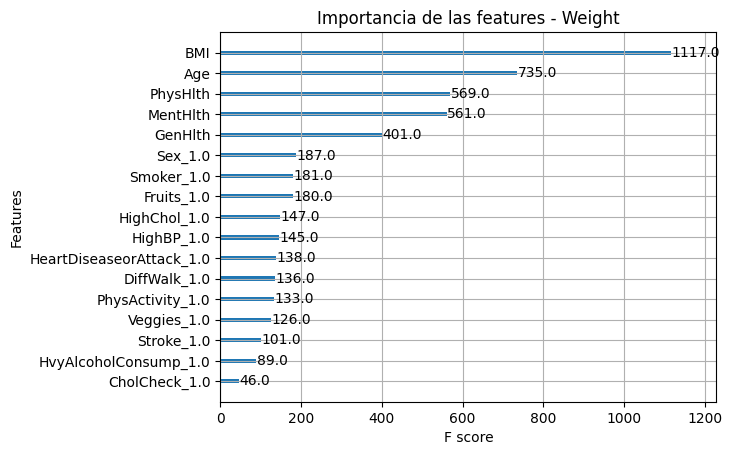

In [8]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

# Obtener la importancia de las features
plot_importance(pipeline.named_steps['classifier'], importance_type='weight')
plt.title('Importancia de las features - Weight')
plt.show()

**Importancia de las features - Weight**: Esta métrica indica cuántas veces una característica aparece en los árboles del modelo. Aquí vemos que las características `BMI`, `Age`, `PhysHlth` y `MentHlth` tienen los valores más altos, lo que sugiere que estas características son consideradas más importantes en términos de frecuencia de aparición en los árboles.

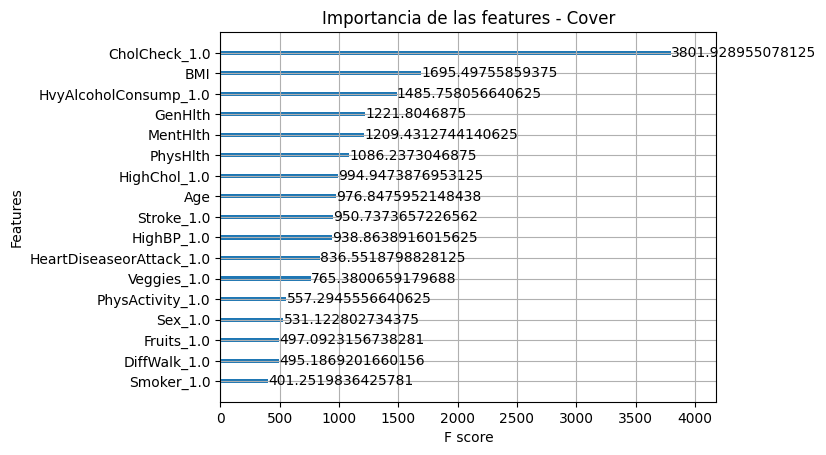

In [9]:
plot_importance(pipeline.named_steps['classifier'], importance_type='cover')
plt.title('Importancia de las features - Cover')
plt.show()

**Importancia de las features - Cover**: Esta métrica muestra la cantidad de datos afectados por la inclusión de una característica en los árboles. Aquí, `CholCheck` tiene un valor alto, seguido por `BMI` y `HvyAlcoholConsump`, lo que implica que estas características afectan a una gran cantidad de datos en los árboles.

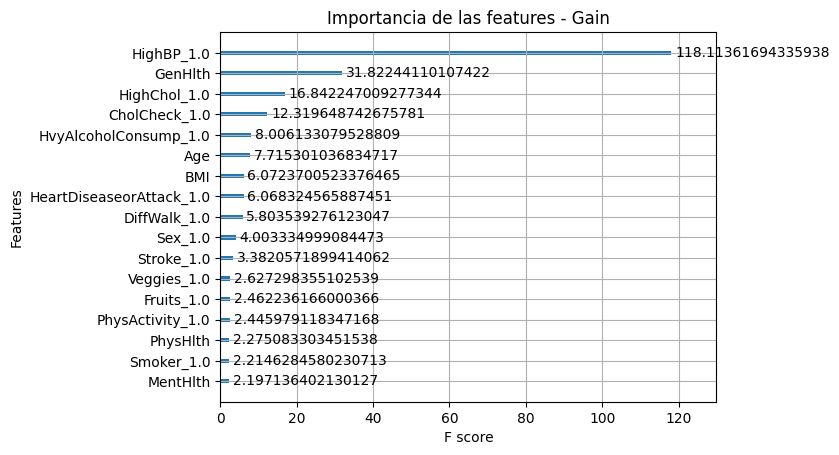

In [10]:
plot_importance(pipeline.named_steps['classifier'], importance_type='gain')
plt.title('Importancia de las features - Gain')
plt.show()

**Importancia de las features - Gain**: Esta métrica mide la ganancia promedio de las características al ser utilizadas en los árboles del modelo. `HighBP`, `GenHlth` y `HichChol` tienen los valores más altos, lo que sugiere que estas características contribuyen significativamente a la reducción del criterio de división (ganancia) en los árboles.

La discrepancia entre los métodos puede ocurrir debido a las diferentes formas en que cada métrica evalúa la importancia de las características. `Weight` se centra en la frecuencia de aparición, `Cover` considera la cantidad de datos afectados y `Gain` evalúa la contribución de la característica en la reducción del criterio de división. Aunque estas métricas proporcionan información valiosa, no capturan interacciones entre características o su impacto conjunto en las predicciones, lo que podría limitar la interpretación completa del modelo. 

## 4. Métodos Agnósticos Globales (1.0 puntos)

<p align="center">
  <img src="https://media.tenor.com/JcRHtjVuXN8AAAAC/dr-simi-farmacias-similares.gif" width="400">
</p>

Para mitigar los problemas encontrados en la sección anterior, Dr. Simi le pide implementar un **método de permutación** que le permita observar la importancia de las features. Visualice los resultados de este método en un gráfico. Para que su modelo sea consistente, repita el proceso **30 veces** y verifique la desviación estándar de sus resultados (¿Qué señala está?). Además, responda las siguientes preguntas:


- ¿Cómo mide la importancia de las features su propuesta?
- ¿Qué features tienen un mayor impacto en la salida del modelo?. Comente las 5 primeras, ¿Tienen sentido?
- ¿Cómo cambian sus conclusiones con respecto a las features importances del punto anterior?
- Nombre y explique 3 ventajas y 3 desventajas del método implementado.

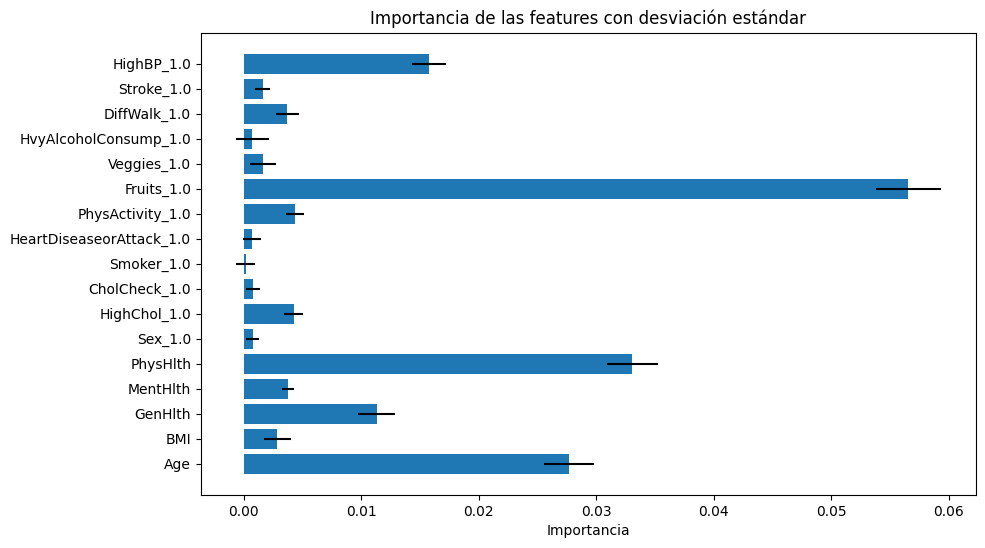

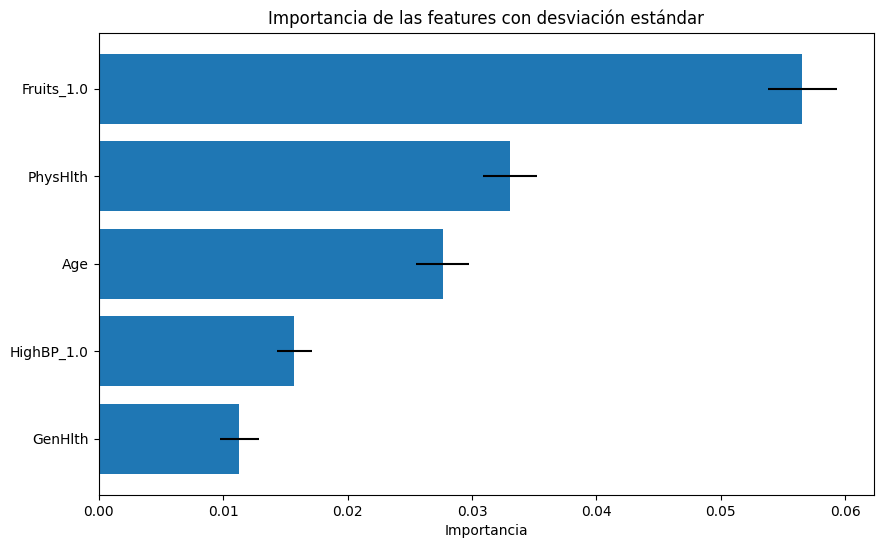

In [11]:
# Inserte su código aquí
from sklearn.inspection import permutation_importance

# Calcular la importancia de las features con el método de permutación
perm_importance = permutation_importance(pipeline, X_test, y_test, n_repeats=30, random_state=42)

# Obtener la importancia promedio y desviación estándar
mean_importance = perm_importance.importances_mean
std_importance = perm_importance.importances_std

# Graficar la importancia de las features
features = pipeline.named_steps['preprocessor'].get_feature_names_out()
plt.figure(figsize=(10, 6))
plt.barh(features, mean_importance, xerr=std_importance, align='center')
plt.xlabel('Importancia')
plt.title('Importancia de las features con desviación estándar')
plt.show()

#Graficamos las 5 variables mas importantes
plt.figure(figsize=(10, 6))
plt.barh(features[np.argsort(mean_importance)[-5:]], mean_importance[np.argsort(mean_importance)[-5:]], xerr=std_importance[np.argsort(mean_importance)[-5:]], align='center')
plt.xlabel('Importancia')
plt.title('Importancia de las features con desviación estándar')
plt.show()



**¿Cómo mide la importancia de las features su propuesta?**

El método de permutación evalúa la importancia de las características al medir cómo su perturbación aleatoria afecta el rendimiento del modelo. Calcula la disminución en la métrica de evaluación (por ejemplo, precisión, exactitud) cuando se permuta cada característica. Las características que, al ser permutadas, causan una mayor reducción en el rendimiento del modelo se consideran más importantes, ya que su información es crítica para las predicciones.

**¿Qué features tienen un mayor impacto en la salida del modelo?. Comente las 5 primeras, ¿Tienen sentido?**

Las cinco características con mayor impacto en la predicción del modelo son:

1. **Consumo de frutas (Fruits_1.0):** Esta característica muestra el mayor impacto en la predicción de diabetes según el método actual. Un mayor consumo de frutas está fuertemente correlacionado con la predicción de diabetes.

2. **PhysHlth:** Esta característica se refiere a la salud física percibida del individuo y su impacto en la predicción de la diabetes. Cuando se permuta esta característica, se observa que tiene un impacto significativo en la capacidad del modelo para predecir la enfermedad. Una mala salud física percibida podría correlacionarse con un mayor riesgo de desarrollar diabetes.

3. **Age:** La edad del individuo es un factor fundamental en la predicción de la diabetes. La perturbación aleatoria de esta característica tiene un efecto notable en la capacidad predictiva del modelo. Se espera que el aumento de la edad esté asociado con un mayor riesgo de diabetes, ya que es un factor de riesgo bien conocido para esta enfermedad.

4. **HighBP_1.0:** La presión arterial alta (HighBP_1.0) es una característica crítica en la predicción de la diabetes. Cuando se altera aleatoriamente esta característica, se observa un impacto significativo en la precisión del modelo. La hipertensión arterial es un factor de riesgo común para la diabetes, y su influencia en el modelo respalda esta asociación.

5. **Salud general (GenHlth):** Se observa que la salud general es una característica crucial en la predicción de diabetes. La salud general puede ser un factor influyente en el riesgo de desarrollar esta enfermedad.

Estas conclusiones respaldan la importancia de las variables relacionadas con la dieta, específicamente el consumo de frutas, junto con otros factores reconocidos como relevantes para la predicción de la diabetes, como el estado físico percibido, la edad, la presión arterial alta y la salud general. Si bien puede haber fluctuaciones en la importancia relativa de estas características, siguen manteniendo coherencia con el conocimiento médico existente sobre los factores de riesgo para la diabetes. Estos resultados consolidan la relevancia de los factores de riesgo clásicos, y el método de permutación refuerza la asociación entre estas características y la capacidad predictiva del modelo.


**¿Cómo cambian sus conclusiones con respecto a las features importances del punto anterior?**

Las conclusiones se alinean en gran medida con las importancias obtenidas previamente. Sin embargo, el método de permutación ofrece una visión más robusta y agnóstica, considerando las interacciones entre las características y su impacto real en la capacidad predictiva del modelo.

**Ventajas**:
1. **Robustez**: Es un método agnóstico que no depende del tipo específico de modelo, por lo que es aplicable a una amplia gama de algoritmos de aprendizaje automático.
2. **Evaluación directa**: Evalúa directamente el impacto de cada característica en el rendimiento del modelo, proporcionando una medida precisa de su importancia.
3. **Estimación de confianza**: Calcula la desviación estándar de las importancias, lo que permite evaluar la estabilidad y confiabilidad de las evaluaciones.

**Desventajas**:
1. **Costoso computacionalmente**: Al permutar características múltiples veces, puede ser computacionalmente costoso, especialmente en conjuntos de datos grandes.
2. **Dependencia del tamaño de muestra**: En conjuntos de datos pequeños, las estimaciones pueden ser menos precisas.
3. **Interpretación limitada**: Aunque muestra la importancia relativa de las características, no revela relaciones causales ni interacciones entre las mismas.

## 5. Métodos Agnósticos Locales (2.0 puntos)

<p align="center">
  <img src="https://i.makeagif.com/media/1-27-2017/fBrzT8.mp4" width="400">
</p>

### 5.1 Calculando Shap Values (0.4 puntos)

Alegre por saber cómo funciona el modelo de predicción a nivel general, Dr. Simi le pide ahora interpretar las predicciones de su modelo a nivel de paciente (es decir, desde un punto de vista **local**). Para esto, el ilustre farmacéutico le pide calcular los *shap values* de su modelo. ¿Qué representa cada número en su resultado? ¿Es posible atribuir un significado a la positividad/negatividad de cada valor?

In [12]:
import warnings
warnings.filterwarnings("ignore", message=".*The 'nopython' keyword.*")

In [13]:
# Inserte código para calcular shapley values aquí
import shap

# Crear el explainer con el conjunto de entrenamiento
model_xgb= pipeline.named_steps['classifier']
procesamiento= pipeline.named_steps['preprocessor']

explainer = shap.TreeExplainer(model_xgb)

# Calcular los shapley values con el conjunto de prueba
X = df.copy()
X = X.drop(columns=['Diabetes'])
procesamiento.fit(X_train)
X_p = procesamiento.transform(X)

shap_values = explainer.shap_values(X_p)
print(shap_values)

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
[21:55:42] WARNING: /Users/runner/work/xgboost/xgboost/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


[[-1.268375   -0.39595905  0.19915317 ... -0.08242669 -0.01611218
   0.49607974]
 [ 0.20216312 -0.26411402  0.13971636 ... -0.05447157  0.07768464
   0.41628882]
 [ 0.91174173 -0.24660446 -0.9846991  ... -0.06976558 -0.02217249
  -0.64350384]
 ...
 [-0.2627788  -0.29915717  0.86942726 ...  0.29957864 -0.01806796
   0.47976932]
 [ 0.3048206  -0.7575991   0.80530185 ...  0.26907772 -0.02126826
   0.58223975]
 [ 0.17443809 -0.3255199  -0.5975678  ... -0.0959989  -0.03462881
   0.53356117]]


Los valores de los SHAP (SHapley Additive exPlanations) representan la contribución de cada característica a la predicción del modelo para un caso individual en comparación con la predicción promedio del modelo.

Cada número en los SHAP values indica cómo esa característica específica influye en la predicción del modelo para un caso particular. La positividad o negatividad de cada valor se interpreta en relación con su efecto en la predicción:

**Valores positivos**: Indican que la presencia o el valor alto de esa característica contribuye a aumentar la predicción del modelo para ese caso en particular en comparación con la predicción promedio.
**Valores negativos**: Sugieren que la ausencia o un valor bajo de esa característica contribuye a disminuir la predicción del modelo para ese caso específico en comparación con la predicción promedio.

### 5.2 Aporte local (0.4 puntos)

Usando los *shap values* calculados, grafique el **aporte** de las diferentes variables para las instancias **1**, **9** y **150**, interprete sus resultados y responda:
- ¿Qué variables afectan de manera positiva/negativa a la probabilidad de poseer diabetes? 
- ¿Existe algún patrón común entre las instancias analizadas? 
- ¿Es posible generalizar estas conclusiones a todo el dataset?

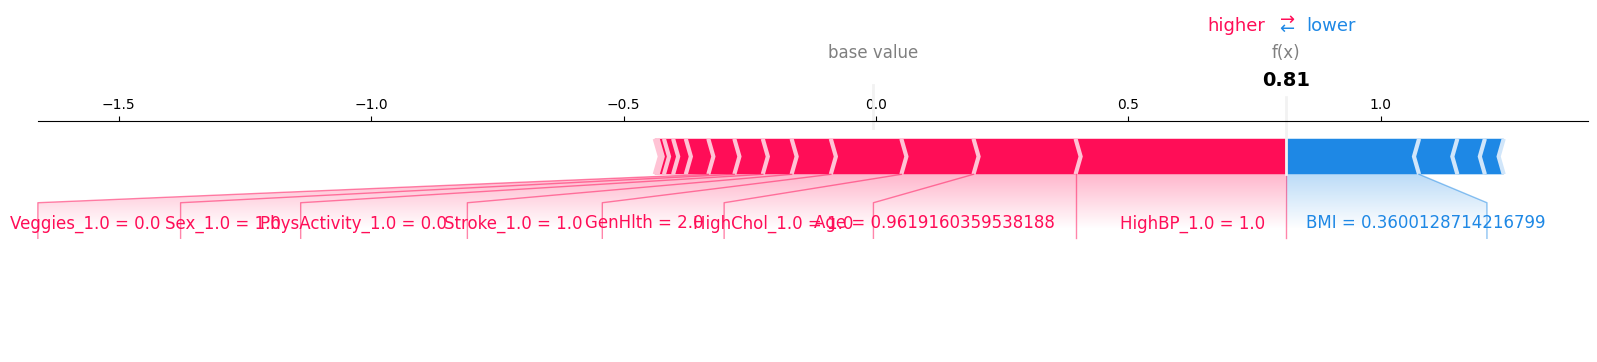

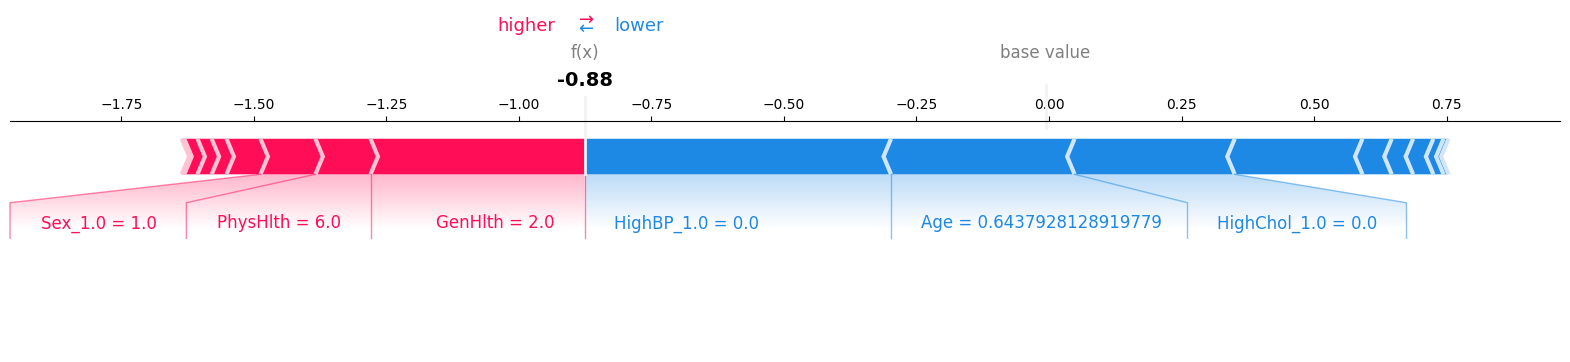

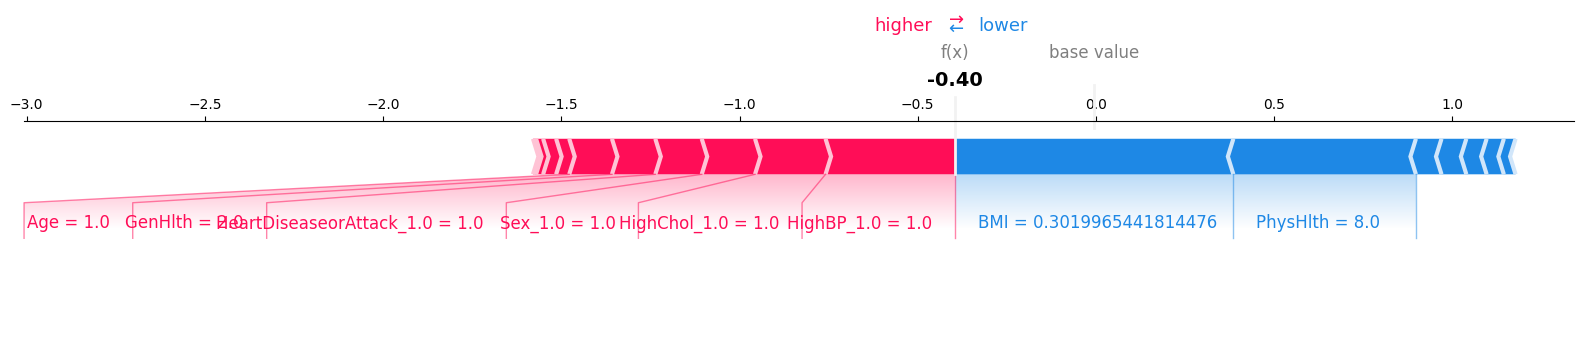

In [14]:
shap.initjs()
shap_values_df = pd.DataFrame(shap_values, columns=X_p.columns)

# Obtener el aporte de las diferentes variables para las instancias 1, 9 y 150
instances = [1, 9, 150]

for instance in instances:
    shap.force_plot(explainer.expected_value, shap_values[instance], X_p.iloc[instance], matplotlib=True)


Los gráficos muestran la influencia de distintas características en predicciones específicas. Para la diabetes, las variables Sex, Age, BMI, HightBP, CholCheck, Smoker y HearthDiseaseAttack tienen un impacto positivo, mientras que PhyActivity y HeartDiseaseorAttack lo tienen de manera negativa. Sin embargo, estas relaciones no se mantienen consistentes en todos los casos.

Es crucial tener en cuenta que estas instancias individuales no definen un patrón general para los datos. Aunque algunas variables tienen un peso significativo, es importante ser precavidos al interpretar los valores SHAP, ya que representan promedios y no se aplican de manera específica a cada caso.

### 5.3 Aporte global (0.4 puntos)

Genere ahora una visualización donde se grafique el aporte de cada feature a nivel **global** e interprete sus resultados. ¿Qué diferencias existen con las conclusiones generadas a nivel de instancia?

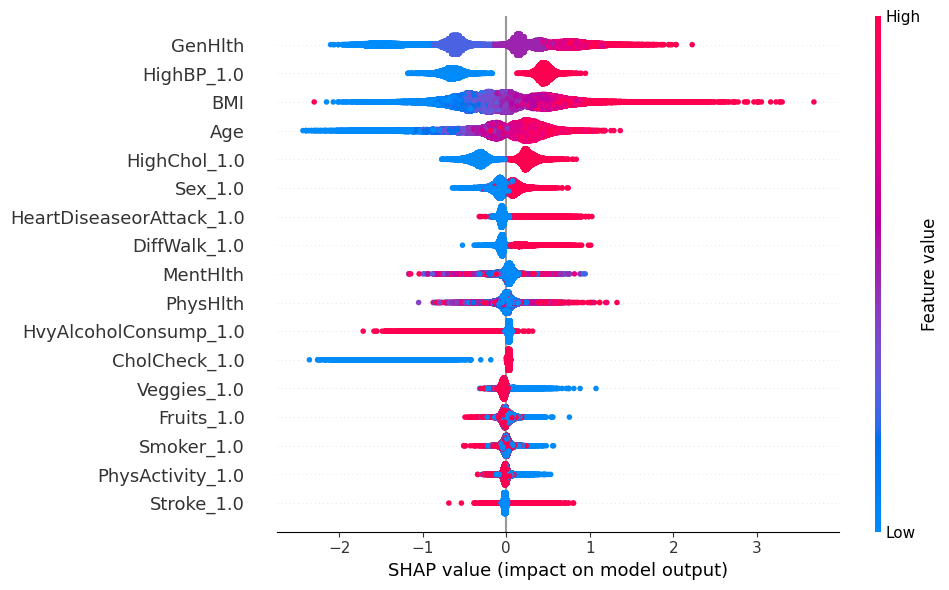

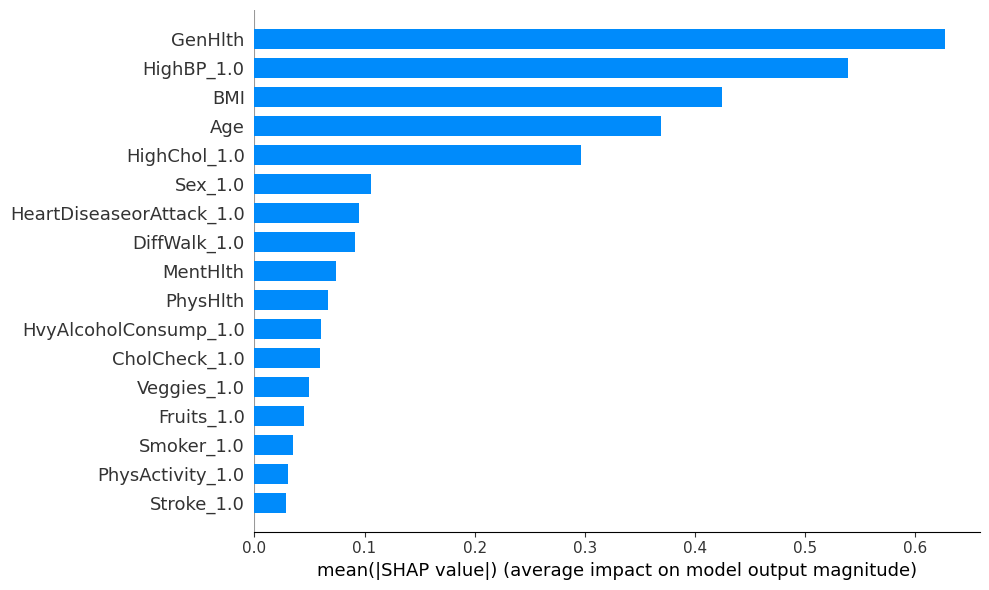

{'Age': 0.3695549, 'BMI': 0.42440224, 'GenHlth': 0.62779284, 'MentHlth': 0.07428264, 'PhysHlth': 0.06652404, 'Sex_1.0': 0.106320865, 'HighChol_1.0': 0.2966173, 'CholCheck_1.0': 0.05924874, 'Smoker_1.0': 0.035253406, 'HeartDiseaseorAttack_1.0': 0.09497529, 'PhysActivity_1.0': 0.030780064, 'Fruits_1.0': 0.04488795, 'Veggies_1.0': 0.049454954, 'HvyAlcoholConsump_1.0': 0.060882382, 'DiffWalk_1.0': 0.09124153, 'Stroke_1.0': 0.028484251, 'HighBP_1.0': 0.5392135}


In [15]:
# Graficar los shap values
shap.summary_plot(shap_values, X_p, 
                  #plot_type='bar',
                    plot_size=(10, 6))
plt.show()

shap.summary_plot(shap_values, X_p, 
                  plot_type='bar',
                    plot_size=(10, 6))
plt.show()

# Generamos un diccionario con la variable y su respectivo shapley value
shap_dict = dict(zip(X_p.columns, np.mean(np.abs(shap_values), axis=0)))
print(shap_dict)

**Promedio vs. Instancia Individual:** Los valores en el diccionario SHAP muestran la importancia promedio de cada variable en todas las predicciones del modelo. Por otro lado, las conclusiones a nivel de instancia podrían resaltar cómo cada variable afecta predicciones específicas, lo que puede variar de un caso a otro.

**Interpretación General vs. Caso Específico:** El gráfico de SHAP resalta la importancia general de las variables para el modelo en su conjunto, mientras que las conclusiones a nivel de instancia podrían ofrecer información detallada sobre cómo una variable específica influye en una predicción particular para un individuo en particular.

### 5.4 Scatter plot (0.4 puntos)

Grafique ahora un *scatterplot* entre los *shap values* y las primeras 5 features con mayor impacto global (un gráfico por cada feature), coloreando cada punto por la probabilidad de tener diabetes. ¿Qué puede concluir de sus resultados?

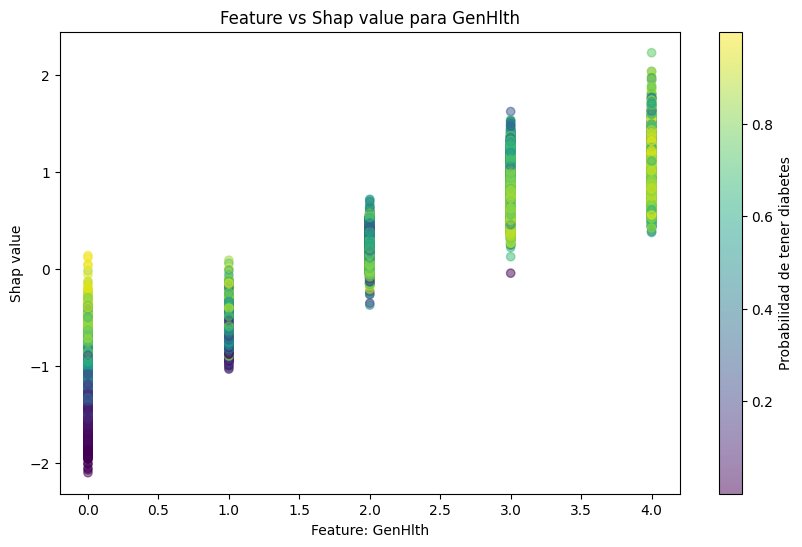

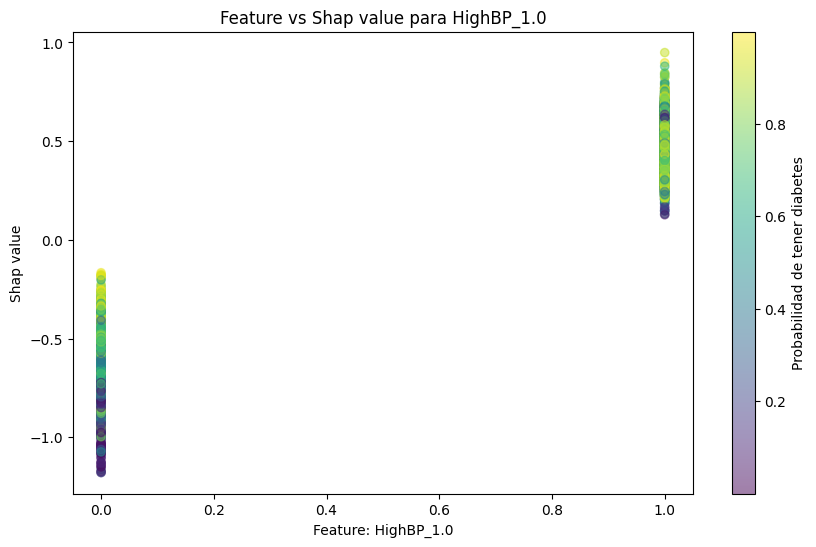

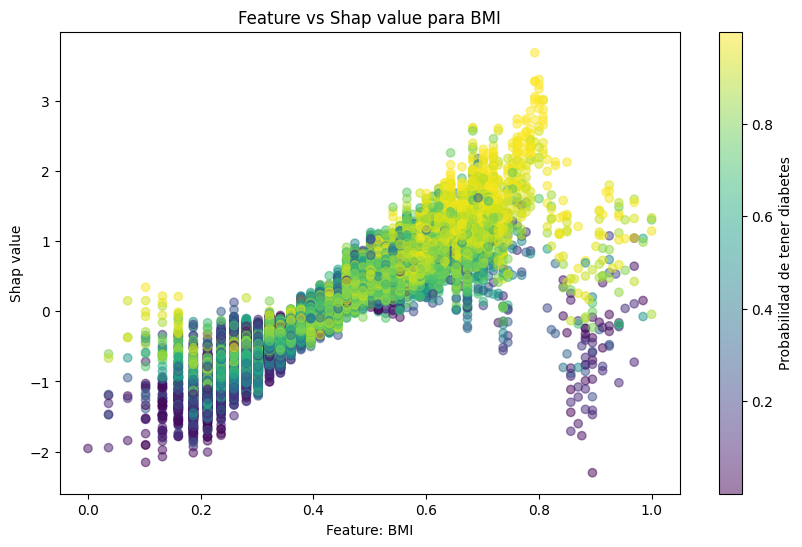

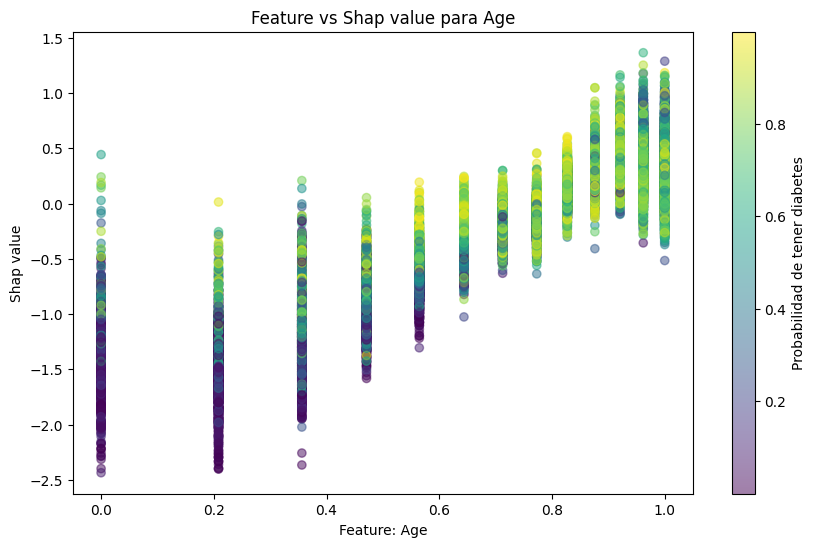

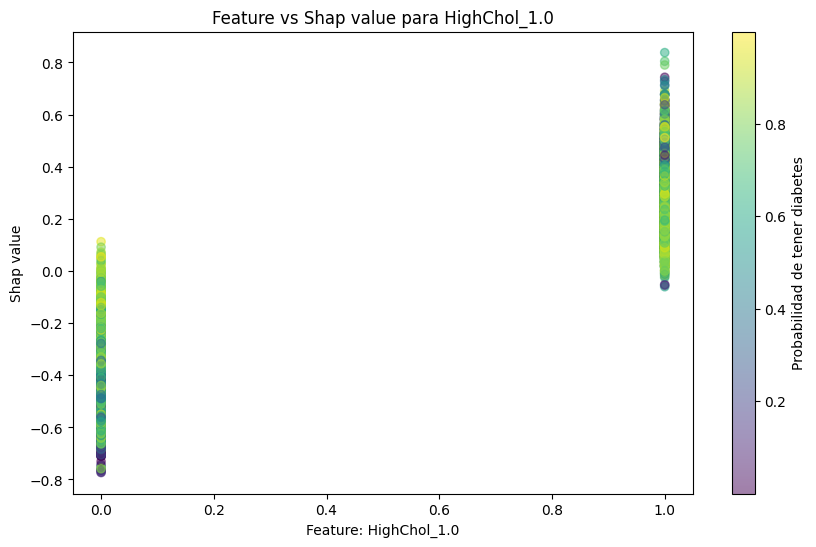

In [16]:
# Inserte código para generar gráficos de feature vs shap value aquí
import matplotlib.pyplot as plt

# Calcular el impacto global de cada característica
summary_vals = np.abs(shap_values).mean(axis=0)

# Seleccionar las 5 características con mayor impacto
top_features = summary_vals.argsort()[::-1][:5]


probs = model_xgb.predict_proba(X_p)[:, 1]

# Crear los scatter plots para cada una de las 5 características, con el color indicando la probabilidad de tener diabetes
for i, feature in enumerate(top_features):
    plt.figure(figsize=(10, 6))
    plt.scatter(X_p.iloc[:, feature], shap_values[:, feature], c=probs,cmap='viridis', alpha=0.5)
    plt.xlabel(f'Feature: {X_p.columns[feature]}')
    plt.ylabel('Shap value')
    plt.title(f'Feature vs Shap value para {X_p.columns[feature]}')
    plt.colorbar( label='Probabilidad de tener diabetes')
    plt.show()



1. **Salud General (GenHlth):** A medida que la puntuación de salud general aumenta en una unidad, se observa un marcado incremento en la probabilidad y la incidencia de diabetes, según los valores SHAP del modelo.

2. **Presión Arterial Alta (HighBP_1.0):** El gráfico muestra una tendencia clara: cuando hay presión arterial alta, los valores SHAP tienden a ser más elevados. Esto sugiere que la presión arterial alta contribuye significativamente al riesgo de diabetes, según el modelo.

3. **Índice de Masa Corporal (BMI):** A medida que aumenta el BMI, los valores SHAP tienden a ser más positivos. Esto podría indicar una asociación entre un BMI más alto y una mayor contribución al riesgo de diabetes, según lo predicho por el modelo.

4. **Edad (Age):** Se observa que a medida que la edad aumenta, los SHAP values también crecen, reflejando un aumento en la probabilidad de padecer diabetes, según el modelo.

5. **Colesterol Alto (HighChol_1.0):** Los valores de SHAP muestran que no presentar colesterol alto se asocia con valores más bajos en comparación con aquellos que tienen niveles altos de colesterol. Por lo tanto, se espera que el colesterol alto esté vinculado a una mayor probabilidad de tener diabetes, según lo indicado por el modelo.

### 5.5 Partial Dependence Plot (0.4 puntos)

Finalmente, se le pide generar un gráfico del tipo **Partial Dependence Plot** para las mismas 5 variables con mayor impacto global usando una submuestra de **1000 observaciones**. ¿Qué relación existe entre la salida promedio del modelo y cada feature analizada? ¿Son estas conclusiones generalizables para todo el conjunto de datos?

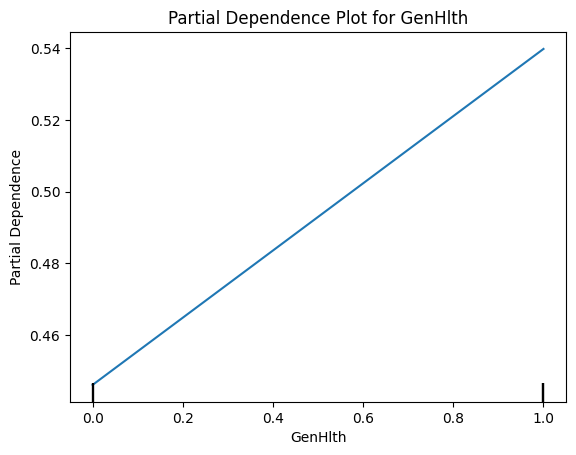

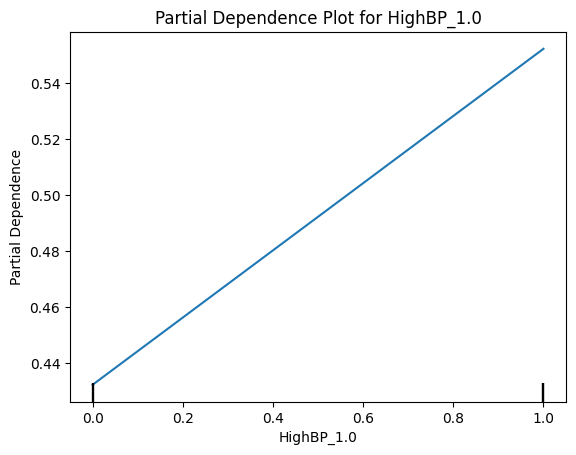

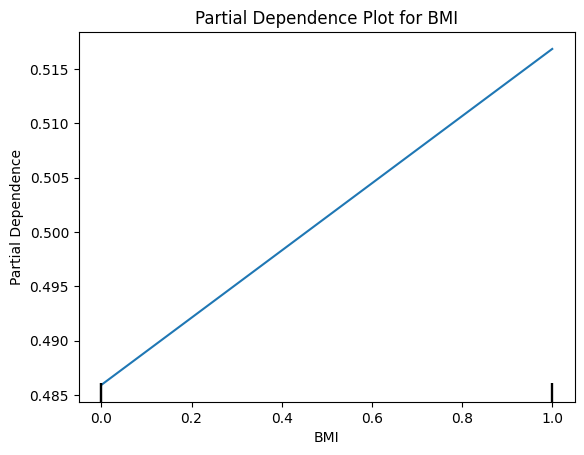

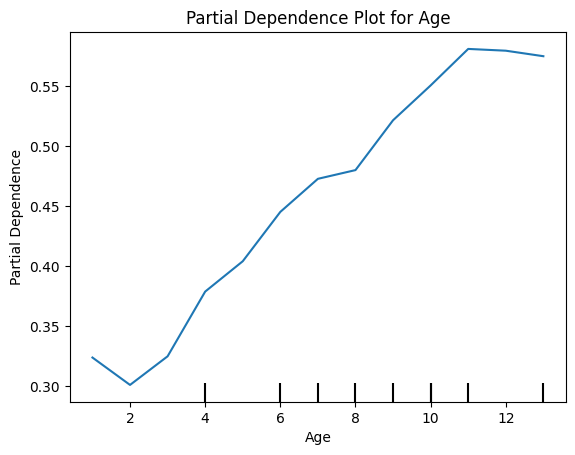

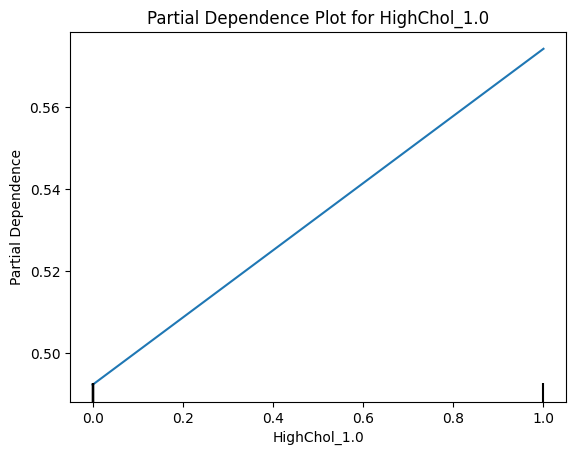

In [17]:
from sklearn.inspection import PartialDependenceDisplay

# Seleccionar las 5 características con mayor impacto global
top_features = summary_vals.argsort()[::-1][:5]

# Crear un subconjunto de 1000 observaciones del conjunto de datos
X_subsample = X.sample(n=1000, random_state=42)

# Generar los gráficos PDP para las 5 variables seleccionadas
for feature in top_features:
    pd_plot = PartialDependenceDisplay.from_estimator(pipeline, X_subsample, [feature])
    pd_plot.plot(ax=plt.gca())
    plt.xlabel(X_p.columns[feature])
    plt.ylabel('Partial Dependence')
    plt.title(f'Partial Dependence Plot for {X_p.columns[feature]}')
    plt.show()



1. **Edad (Age):** Existe una clara asociación entre la edad y la incidencia de diabetes, mostrando un aumento continuo en la probabilidad a medida que la edad avanza, lo que sugiere una tendencia lineal en este riesgo.

2. **Presión Arterial Alta (HighBP) y Colesterol Alto (HighChol):** Se evidencia un incremento significativo en la probabilidad de padecer diabetes cuando estas variables están activadas. Este descubrimiento respalda la relación establecida por la comunidad médica entre la presión arterial alta, altos niveles de colesterol y un mayor riesgo de diabetes.

3. **Índice de Masa Corporal (BMI):** La relación entre el BMI y la probabilidad de diabetes no es lineal. A medida que el BMI aumenta, la probabilidad de diabetes tiende a incrementarse, pero esta relación no sigue un patrón lineal. En lugar de ello, presenta oscilaciones con una tendencia logarítmica. Esto sugiere que, aunque el riesgo de diabetes se incrementa con un aumento en el BMI, este aumento no es uniforme y sigue un patrón no lineal.

4. **Salud General (GenHlth):** Se observa una relación lineal entre la salud general y la probabilidad de diabetes. A medida que la salud general disminuye, se espera un aumento en la probabilidad de presentar diabetes. Esto indica que a medida que empeora la salud general, aumenta la probabilidad de desarrollar diabetes.

## 6. Sistema de Reglas! (1.0 puntos)

<p align="center">
  <img src="https://media.baamboozle.com/uploads/images/125978/1638281150_1380186_gif-url.gif" width="400">
</p>

Después de todo el trabajo hecho, Dr. Simi le pide simplificar el funcionamiento de su modelo en un sistema de reglas que le permita explicar a sus clientes las predicciones que genera su modelo. En particular, Dr. Simi le pide explicar la decisión tomada para las observaciones **1000**, **3001** y **5751**. Con las reglas propuestas señale a **cuánta población** es posible explicar con estas reglas e indique la **precisión** que poseen las reglas en la totalidad de los datos. ¿Tienen sentido sus reglas propuestas para las observaciones?. Fundamente sus respuesta seña
lando el impacto que tienen sus reglas sobre todo el conjunto de datos.

In [1]:
from alibi.explainers import AnchorTabular

In [ ]:
# Inserte su código para generar sistema de reglas aquí

# Crear el explainer
explainer = AnchorTabular(model_xgb.predict, feature_names=X_test.columns, seed=42)
explainer.fit(X_train.to_numpy())
clases = ['Sin Diabetes', 'Con Diabetes']
# Explicar la predicción para la observación 1000
idx = 1000
print(f'Predicción observación: {idx}')
explanation_1000 = explainer.explain(X_test.to_numpy()[idx], threshold=0.95)
print('Precision: %.2f' % explanation_1000.precision)
print('Cobertura: %.2f' % explanation_1000.coverage)
print('----Reglas:----')
for rule in explanation_1000.raw['names']:
    print(rule)
print()
# Explicar la predicción para la observación 3001
idx = 3001
print(f'Predicción observación: {idx}')
explanation_3001 = explainer.explain(X_test.to_numpy()[idx], threshold=0.95)
print('Precision: %.2f' % explanation_3001.precision)
print('Cobertura: %.2f' % explanation_3001.coverage)
print('----Reglas:----')
for rule in explanation_3001.raw['names']:
    print(rule)
print()

# Explicar la predicción para la observación 5751
idx = 5751
print(f'Predicción observación: {idx}')
explanation_5751 = explainer.explain(X_test.to_numpy()[idx], threshold=0.95)
print('Precision: %.2f' % explanation_5751.precision)
print('Cobertura: %.2f' % explanation_5751.coverage)
print('----Reglas:----')
for rule in explanation_5751.raw['names']:
    print(rule)
print()

Predicción observación: 1000
Precision: 0.97
Cobertura: 0.34
----Reglas:----
Sex > 0.00
PhysActivity > 0.00

Predicción observación: 3001
Precision: 0.96
Cobertura: 0.34
----Reglas:----
Sex > 0.00
PhysActivity > 0.00

Predicción observación: 5751
Precision: 0.98
Cobertura: 0.34
----Reglas:----
Sex > 0.00
PhysActivity > 0.00



Las reglas extraídas para las observaciones 1000, 3001 y 5751 son similares:

- **Regla 1:** Sex > 0.00
- **Regla 2:** PhysActivity > 0.00

La precisión reportada para estas reglas es alta, alrededor del 96-98%, lo que significa que estas reglas explican correctamente la predicción del modelo para las observaciones especificadas en la mayoría de los casos.

Sin embargo, la cobertura de estas reglas es relativamente baja, alrededor del 34%. Esto implica que estas reglas solo se aplican a una fracción limitada de la población de datos. Aunque estas reglas son precisas para las observaciones seleccionadas, no son representativas de la totalidad del conjunto de datos.

Las reglas propuestas, basadas únicamente en las variables Sex y PhysActivity, parecen ser demasiado simplistas para explicar las predicciones de manera global. Es posible que estas reglas sean precisas para las observaciones específicas proporcionadas, pero su alcance limitado no las hace suficientemente robustas para explicar las predicciones en todo el conjunto de datos.

Mientras que las reglas proporcionadas tienen alta precisión para las observaciones individuales, su baja cobertura y la simplicidad de las variables involucradas sugieren que estas reglas podrían no ser representativas ni generalizables para todo el conjunto de datos. Es probable que se necesite considerar un conjunto más amplio de variables o reglas más complejas para explicar las predicciones de manera más completa y precisa en el conjunto de datos completo.

# Retrospectiva... (1.0 puntos)

En base a los diferentes métodos que implementa y ha comentado en este laboratorio, comente qué métodos le permiten entregar mejores conclusiones para la tarea de clasificación de diabetes. Por otro lado, ¿qué métodos son más útiles para el problema del doctor Simi, métodos agnosticos locales o globales?

La interpretación contextualizada, al combinar métodos locales y globales, permite una comprensión más profunda de los modelos de clasificación de la diabetes. Los resultados del laboratorio demostraron que tanto los métodos locales, como SHAP a nivel individual y las Reglas de Anclaje, junto con métodos globales como la Importancia de las Características y los Gráficos de Dependencia Parcial, ofrecen una visión completa de las decisiones del modelo.

En el ámbito médico, la interpretación humana sigue siendo fundamental. A pesar de la automatización, comprender los resultados y explicarlos con claridad a los pacientes y profesionales de la salud es esencial. Los resultados del laboratorio subrayan la importancia de comunicar de manera clara y precisa cómo se llega a las predicciones, especialmente en un contexto médico donde la confianza en el diagnóstico puede influir en el abordaje de la enfermedad por parte del paciente.

La transparencia y la ética también emergen como aspectos críticos en la aplicación de estos métodos, y los resultados del laboratorio resaltan la necesidad de garantizar la comprensión de los pacientes sobre cómo se emplean sus datos y cómo se generan las conclusiones.

Además, se reconoce la evolución constante de estos métodos y la importancia de la investigación continua en interpretabilidad y explicabilidad en aprendizaje automático. Esto se vuelve crucial para mejorar la confianza en los modelos, particularmente en aplicaciones médicas donde la precisión y la comprensión de las predicciones son fundamentales.

# Conclusión
Eso ha sido todo para el lab de hoy, recuerden que el laboratorio tiene un plazo de entrega de una semana. Cualquier duda del laboratorio, no duden en contactarnos por mail o U-cursos.

![Gracias Totales!](https://media.tenor.com/ctnq4bhZE3gAAAAC/drsimi-simi.gif)

In [19]:
# importamos el archivo Laboratorio10_Enunciado.ipynb como html 
!jupyter nbconvert --to html Laboratorio10_Enunciado.ipynb

[NbConvertApp] Converting notebook Laboratorio10_Enunciado.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 29 image(s).
[NbConvertApp] Writing 2237313 bytes to Laboratorio10_Enunciado.html


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=87110296-876e-426f-b91d-aaf681223468' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>